# Doença Cardíaca UCI 

<hr>

### Cardiologia 

Cardiologia(Estudo do Coração) é a especialidade médica que se ocupa do diagnóstico e tratamento das doenças que acometem o coração bem como os outros componentes do sistema circulatório. O médico especialista nessa área é o cardiologista.

Um dos exames mais comumente realizados, feito por rotina, durante uma consulta de cardiologia é o eletrocardiograma, que deverá ser interpretado e laudado pelo cardiologista.

### O que é Doença cardíaca?
Doença cardíaca é um termo geral para designar diversas condições médicas crônicas ou agudam que afetam um ou mais componentes do coração.
Entre os pulmões existe uma cavidade conhecida como mediastino. Este é o lugar onde o coração está posicionado – partindo do centro do corpo humano, dois terços para a esquerda. O coração é um órgão muscular do tamanho de um punho, que bombeia o sangue através da rede de artérias e veias chamada sistema cardiovascular.

O coração tem quatro câmaras:

* Átrio direito: recebe o sangue das veias e bombeia para o ventrículo direito
* Ventrículo direito: recebe o sangue do átrio direito e bombeia para os pulmões, onde ele é carregado com oxigênio
* Átrio esquerdo: recebe sangue oxigenado dos pulmões e bombeia para o ventrículo esquerdo
* Ventrículo esquerdo: bombeia o sangue oxigenado para o resto do corpo. As contrações do ventrículo esquerdo criam a nossa * * * pressão arterial.

As artérias coronárias correm ao longo da superfície do coração e fornecem sangue rico em oxigênio ao músculo cardíaco. Uma teia de tecido nervoso também atravessa o coração, conduzindo os sinais neurológicos complexos que regem a contração e relaxamento. Essa teia que envolve o coração é um saco chamado pericárdio.

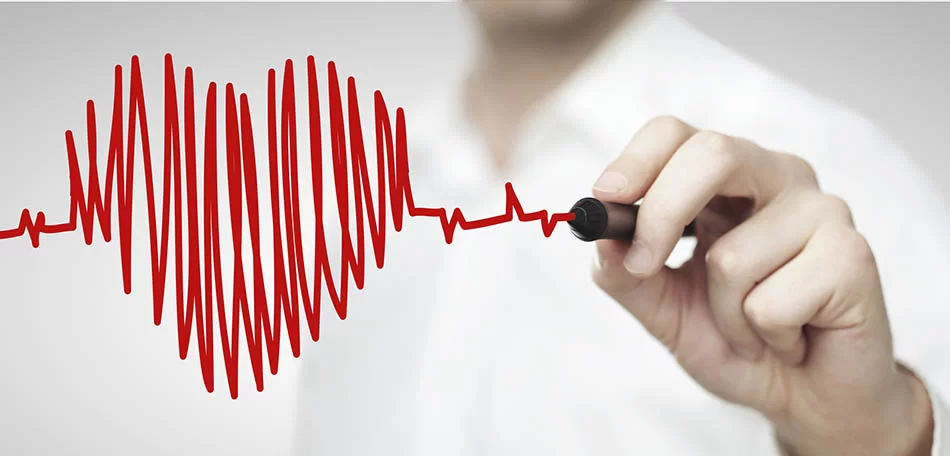

### Problemática 

O hospital de Cleveland abriu sua base dados de pacientes e a a estrutura do banco de dados foi replicada para outros hospitais, a base contém dados de cada paciente e através desses dados precisamos predizer qual paciente tem ou não tem uma doença cardíaca. 
 
 Criadores da Base:
1. Instituto Húngaro de Cardiologia. Budapeste: Andras Janosi, MD
2. Hospital Universitário, Zurique, Suíça: William Steinbrunn, MD
3. Hospital Universitário, Basileia, Suíça: Matthias Pfisterer, MD
4. Centro Médico VA, Long Beach e Cleveland Clinic Foundation: Robert Detrano, MD, Ph.D.

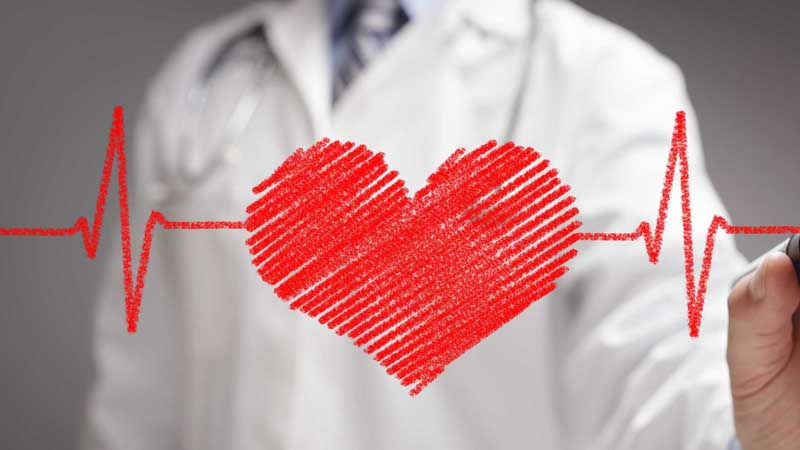

In [1]:
# Importando pacotes

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.externals import joblib

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Marcello\Documents\Felipe-Estudos\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
heart = pd.read_csv('heart.csv')
print('Linhas: {}--- Colunas:{}'.format(heart.shape[0], heart.shape[1]))
heart.head()

Linhas: 303--- Colunas:14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dicionário de dados 

Criar um dicionário de dados para entender cada variável contendo a descrição de cada uma.

In [3]:
def dicio_data():
    
    dicio = pd.DataFrame({'Variável':['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs','Restecg',
                                      'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca','Thal','Target'],
                        'Descrição':['Idade do Paciente', 'Sexo do Paciente',
                                'Tipo de dor no peito', 'pressão arterial em repouso da pessoa',
                                'Medição do colesterol da pessoa em mg / dl', 'O açúcar no sangue em jejum da pessoa', 
                                'Medida eletrocardiográfica em repouso',
                                'A frequência cardíaca máxima da pessoa alcançada', 'Angina induzida pelo exercício (1 = sim; 0 = não)',
                                'Depressão de ST induzida por exercício em relação ao repouso', 'A inclinação do segmento ST do pico', 
                                'O número de navios principais (0-3)', 'Um distúrbio sanguíneo chamado talassemia',
                                    'Doença cardíaca (0 = não, 1 = sim)']})
    return dicio

In [4]:
# Visualizando Dicionário 

dicio_data()

,Variável,Descrição
0,Age,Idade do Paciente
1,Sex,Sexo do Paciente
2,Cp,Tipo de dor no peito
3,Trestbps,pressão arterial em repouso da pessoa
4,Chol,Medição do colesterol da pessoa em mg / dl
5,Fbs,O açúcar no sangue em jejum da pessoa
6,Restecg,Medida eletrocardiográfica em repouso
7,Thalach,A frequência cardíaca máxima da pessoa alcançada
8,Exang,Angina induzida pelo exercício (1 = sim; 0 = não)
9,Oldpeak,Depressão de ST induzida por exercício em rela...


É um conjunto de dados limpo e fácil de entender. No entanto, o significado de alguns dos cabeçalhos das colunas não é óbvio. Aqui está o que eles significam de forma completa.

* age: a idade da pessoa em anos
* sex: o sexo da pessoa (1 = masculino, 0 = feminino)
* cp: Dor no peito (Valor 0: angina típica, Valor 1: angina atípica, Valor 2: dor não anginal, Valor 3: assintomático)
* trestbps: pressão arterial em repouso da pessoa (mm Hg na admissão no hospital)
* chol: Medição do colesterol da pessoa em mg / dl
* fbs: O açúcar no sangue em jejum da pessoa (> 120 mg / dl, 1 = verdadeiro; 0 = falso)
* restecg: Medida eletrocardiográfica em repouso (0 = normal, 1 = com anormalidade da onda ST-T, 2 = mostrando hipertrofia * * * provável ou definitiva do ventrículo esquerdo pelo critério de Estes)
* thalach: A frequência cardíaca máxima da pessoa alcançada
* exang: Angina induzida pelo exercício (1 = sim; 0 = não)
* oldpeak: depressão do ST induzida pelo exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG. Veja mais aqui)
* declive: a inclinação do pico do segmento ST do exercício (Valor 1: ascendente, Valor 2: plano, Valor 3: descendente)
* ca: O número de navios principais (0-3)
* thal: um distúrbio sanguíneo chamado talassemia (3 = normal; 6 = defeito fixo; 7 = defeito reversível)
* target: Doença cardíaca (0 = não, 1 = sim)

### Análise de dados 

In [5]:
##import pandas_profiling as pp

In [6]:
# Retroceder a versão do pandas 
##!pip install pandas==0.19.2

##pp.ProfileReport(heart)

### Resumo inicial 

O relatório que o Pandas Profiling nos mostra é algo bem completo e muito util para um primeiro contato com um datset, neste caso temos poucas observações mas ele tem uma secção muito interessante que é o <b> Warnings </b> que reporta possíveis ruídos que nossos dados podem ter.

* Dataset não possui valores nulos, mas possui uma porcentagem relevante de valores zerados. 
* Vamos conferir as distribuições mais de perto. 
* Verificar a aparição de possíveis Outliers. 
* Somente tipo de dados <b> Numéricos e Booleanos </b> contidos na base. 



Doença Cardíaca:  165
Sem Doença Cardíaca:  138


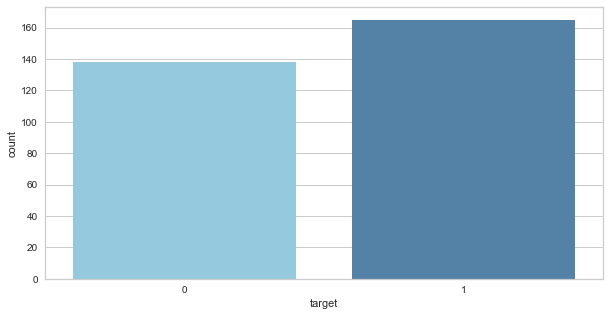

In [7]:
# Verificando o número ocorrências de Doença Cardíaca. 

palette1 = ['#4682B4', '#B0C4DE', '#708090', '#778899', 'BlueViolet']
color1 = ['#87CEEB', '#4682B4']

plt.figure(figsize=(10,5))

sns.countplot(x='target', data=heart, palette=color1)
print('\n')

# Total de avaliados com doença cardíaca

print('Doença Cardíaca: ', heart['target'][heart['target']==1].count())
print('Sem Doença Cardíaca: ', heart['target'][heart['target']==0].count())

As duas classes que indicam se o paciente está ou não com uma doença cardíaca estão bastante equilibradas o que já mostra que não haverá necessidade de balancear elas. 

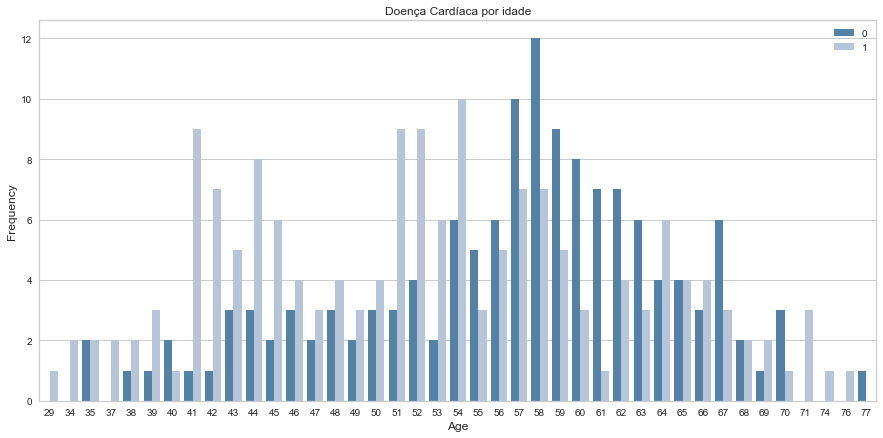

In [8]:
# Relação da idade do paciente com Doença cardíaca 

palette1 = ['#4682B4', '#B0C4DE', '#708090', '#778899', 'BlueViolet']
fig, axe = plt.subplots(figsize=(15,7))

axe = sns.countplot(x='age', data=heart, hue='target', palette=palette1)
axe.set_xlabel('Age', fontsize=12)
axe.set_ylabel('Frequency', fontsize=12)
axe.set_title('Doença Cardíaca por idade')
axe.legend(loc='upper right', fontsize=10)

Vamos criar uma segunda visuzalização com os ranges de idade para uma análise mais específica, será separado em abaixo de 50 anos e acima de 50 anos.

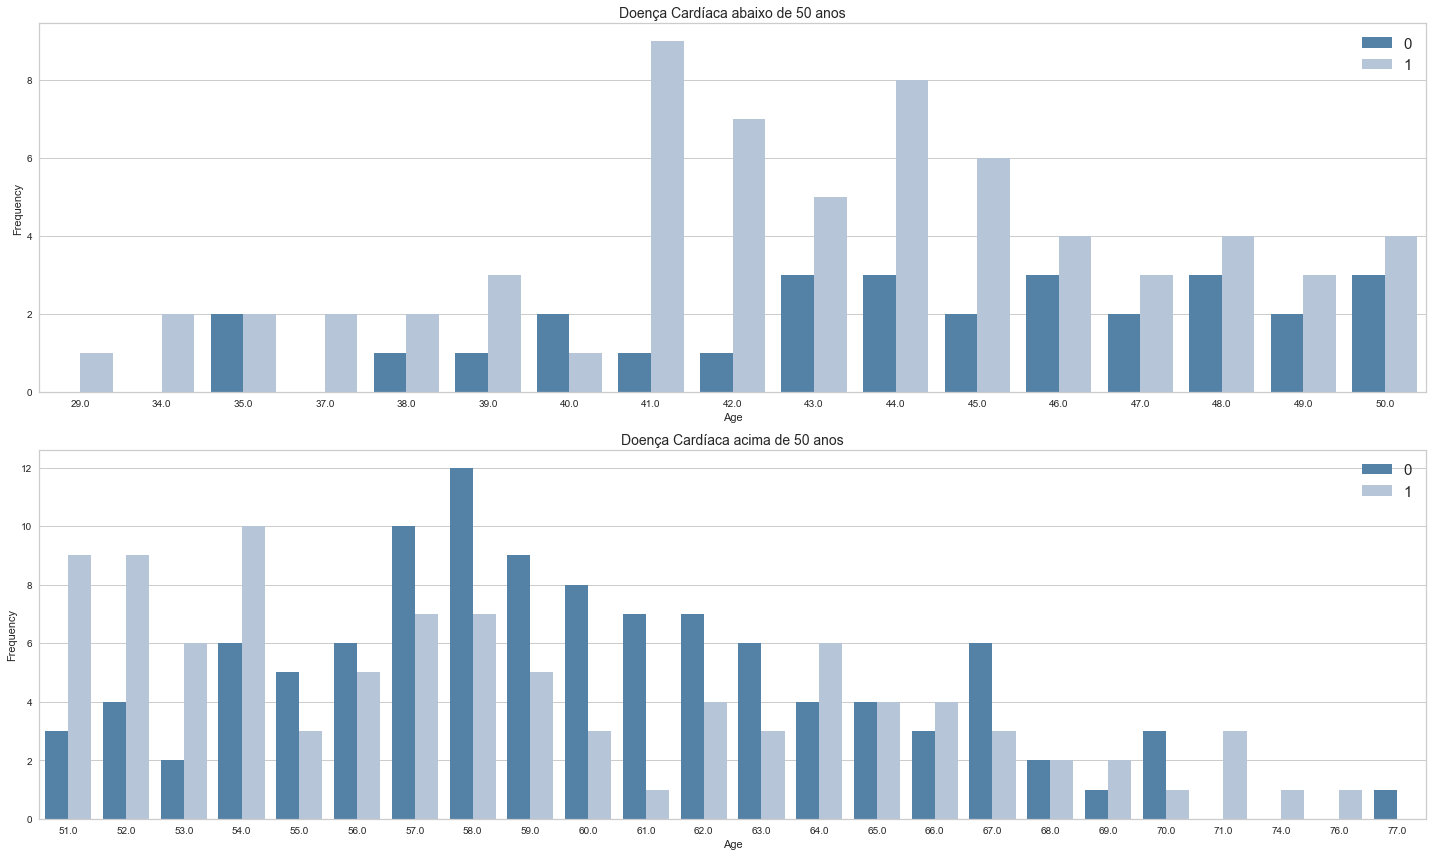

In [9]:
palette1 = ['#4682B4', '#B0C4DE', '#708090', '#778899', 'BlueViolet']
fig, (axe1, axe2) = plt.subplots(nrows=2, ncols=1, figsize=(20,12))

# Separando idades em ranges
heart2 = heart[['age', 'target']]
heart2['age'] = heart2[heart2['age']<=50]

heart3 = heart[['age', 'target']]
heart3['age'] = heart3[heart3['age']>50]

# Gráficos
#fig.suptitle('Doença cardíaca por idade')


sns.countplot(x='age', data=heart2, hue='target', palette=palette1, ax=axe1)
axe1.set_xlabel('Age')
axe1.set_ylabel('Frequency')
axe1.set_title('Doença Cardíaca abaixo de 50 anos', fontsize=14)
axe1.legend(loc='upper right', fontsize=15)


sns.countplot(x='age', data=heart3, hue='target', palette=palette1, ax=axe2)
axe2.set_xlabel('Age')
axe2.set_ylabel('Frequency')
axe2.set_title('Doença Cardíaca acima de 50 anos', fontsize=14)
axe2.legend(loc='upper right', fontsize=15)

fig.tight_layout()

Podemos inferir através da interpretação destes gráficos de que, a idade tem uma variação muito grande de pacientes que tem ou não alguma Doença cardíaca, Vemos que na <b>faixa de até os 50 anos os pacientes com idades com 29 a 39 anos a grande maioria possui uma Doença cardíaca estes que são de idade mais nova contidos na base</b>.

já no segundo gráfico os pacientes com mais de 50 anos apresentam uma variabilidade alta também, <b>pacientes dos 51 aos 54 prevalecem como maioria na classe que possui alguma doença caríaca</b>, no range de 55 até os 63 anos os pacientes não possuem doença cardíaca. Através destes gráficos nossa análise mostra que a idade não seja uma variável que sozinha explique ou determine qual paciente tem ou terá futuramente uma doença cardíaca, as chance que um paciente de 29 anos tem é a mesma de um idoso de 71 anos. 

Homens:  207
Mulheres:  96


Text(0.5, 1.0, 'Doença Cardíaca por Sexo')

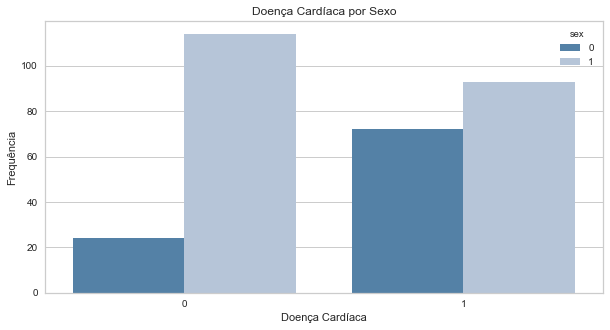

In [10]:
# Análisando sexo por Doença cardíaca  

fig, axe = plt.subplots(figsize=(10,5))

print('Homens: ', heart['sex'][heart['sex']==1].count())
print('Mulheres: ', heart['sex'][heart['sex']==0].count())

#sns.set_style(style='darkgrid')

sns.countplot(x='target', data=heart, palette=palette1, hue='sex')
plt.ylabel('Frequência')
plt.xlabel('Doença Cardíaca')
plt.title('Doença Cardíaca por Sexo')

In [11]:
# Porcentagem por Sexo 
heart['sex'].value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

Os homens aparecem como predominantes nas duas classes, mulheres possuem menos doenças cardíacas que os homens.

<b>Idade: o pico de incidência em homens costuma ser a partir de 45 anos. Já em mulheres, após os 55 anos (a menopausa aumenta o risco cardiovascular)</b>. No entanto, a exposição mais precoce aos fatores de risco pode levar pessoas de 20 a 40 anos a ter infarto.... - Veja mais em https://www.uol.com.br/vivabem/noticias/redacao/2018/10/23/infarto-dor-no-peito-nao-e-unico-sinal-veja-sintomas-e-causas-da-doenca.htm?cmpid=copiaecola

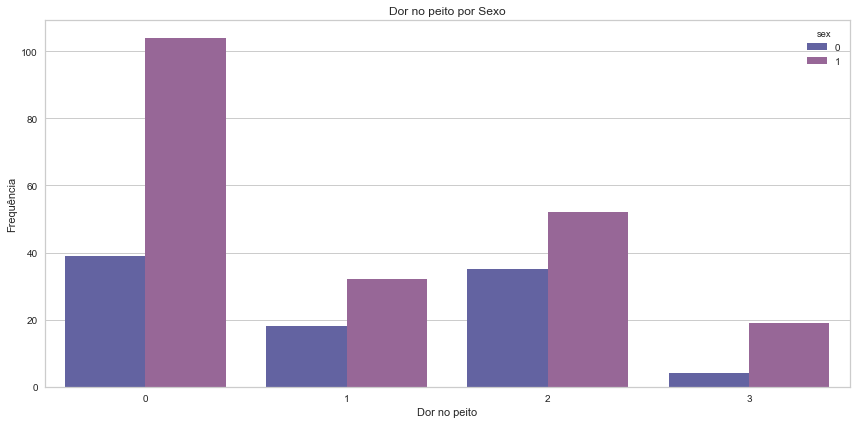

In [12]:
# Dor no peito tem relação com o sexo do paciente ? 

fig, axe = plt.subplots(figsize=(12,6))
palette2 = ['#5959AB', '#9F5F9F']

# Estilo 
#sns.set_style(style='whitegrid')

sns.countplot(x='cp', data=heart, palette=palette2, hue='sex')
plt.xlabel('Dor no peito')
plt.ylabel('Frequência')
plt.title('Dor no peito por Sexo')

fig.tight_layout()

Os homens possuem mais dores no peito que mulheres, nos quatro estágios de gravidade de dor, tendo a informação que homens sofrem mais de doenças cardíacas que mulheres <b>(Dados contidos nesta amostra que nos dizem isso)</b>a dor no peito no peito pode ser um indício muito forte que pode levar o paciente a ter uma doença cardíaca.  

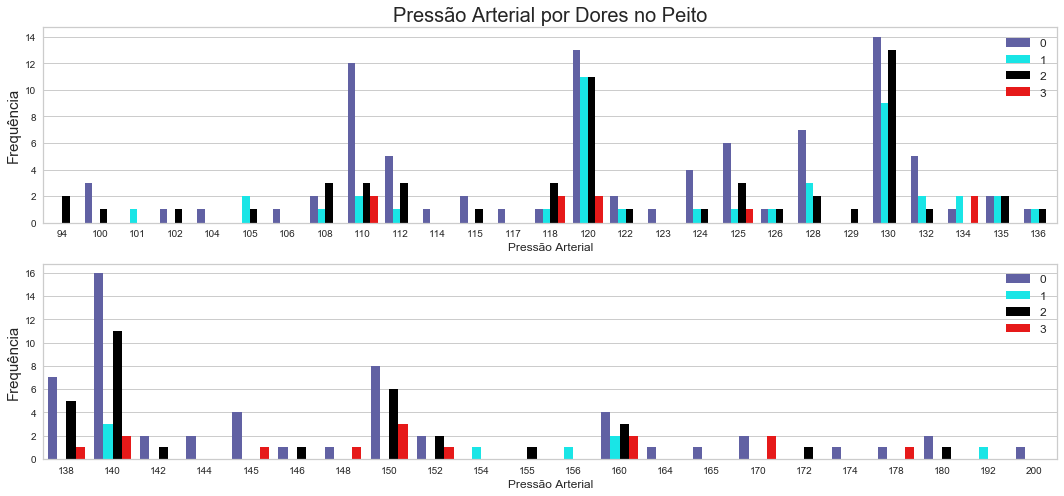

In [13]:
# Pressão Arterial e dor no peito. 

fig, (axe1, axe2) = plt.subplots(nrows=2, ncols=1, figsize=(15,7))

palette3 = ['#5959AB', '#00FFFF', '#000000', '#FF0000']

# Separando em ranges os valores 
heart4 = heart[['trestbps', 'cp']]
heart4 = heart4[heart4['trestbps']<=136]

heart5 = heart[['trestbps', 'cp']]
heart5 = heart5[heart5['trestbps']>136]

# Primeiro Gráfico 
sns.countplot(x='trestbps', data=heart4, palette=palette3, hue='cp', ax=axe1, saturation=0.80)
axe1.set_xlabel('Pressão Arterial', fontsize=12)
axe1.set_ylabel('Frequência', fontsize=15)
axe1.set_title('Pressão Arterial por Dores no Peito', fontsize=20)
axe1.legend(loc='upper right', fontsize=12)


# Segundo Gráfico
sns.countplot(x='trestbps', data=heart5, palette=palette3, hue='cp', ax=axe2, saturation=0.80)
axe2.set_xlabel('Pressão Arterial', fontsize=12)
axe2.set_ylabel('Frequência', fontsize=15)
axe2.legend(loc='upper right', fontsize=12)



fig.tight_layout()

Sintomas da pressão alta
Os sintomas da hipertensão costumam aparecer somente quando a pressão sobe muito: <b>podem ocorrer dores no peito</b>, dor de cabeça, tonturas, zumbido no ouvido, fraqueza, visão embaçada e sangramento nasal.

De fato o que faltava era saber se a Pressão arterial tem alguma relação com dores no peito, neste momento eu resalto a importância de se ter entendimento do negócio que está sendo tratado, pode trazer insights maiores sobre o problema que está tentando resolver.Nesta análise em particular o entendimento do negócio nos trouxe uma visão expandida dos dados, vou listar abaixo cada tipo de dor no peito que contém nos dados e o seus sintomas e veja a relação entre essas variáveis.
<br><br>

### Dores no peito e seus tipos
<br>

<b>ANGINA</b>
* Angina de peito é a dor ou desconforto que ocorre quando o músculo do coração não recebe o suporte adequado de sangue. Angina de peito (angina pectoris) é a descrição utilizada para caracterizar a dor torácica causada pela falta de sangue (isquemia) que acomete o músculo cardíaco.<b>A angina é quase sempre relacionada a doenças que causam obstrução nas artérias responsáveis por  levar sangue ao coração</b>, as coronárias. 

    
- Angina estável : É aquela causada pelo esforço físico. A obstrução não é grande o suficiente para causar dor em repouso. A dor dura poucos minutos e alivia alguns minutos após o repouso. 

<b>ASSINTOMÁTICO</b>

* Sem sintomas (indícios), Em medicina, uma doença é considerada assintomática se um paciente é portador de uma doença ou infecção mas não exibe sintomas. A condição pode ser assintomática se esta falha a mostrar os sintomas perceptíveis na qual a doença é normalmente associada. Infecções assintomáticas são também chamadas de infecções subclínicas. O termo clinicamente silenciosa também é usado para definir doenças assintomáticas.



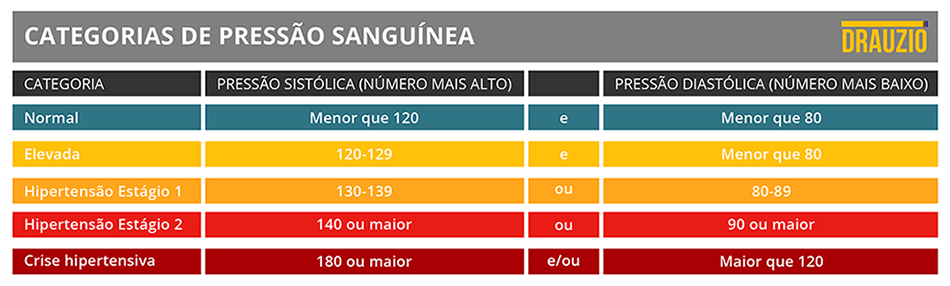

<br>
<br>

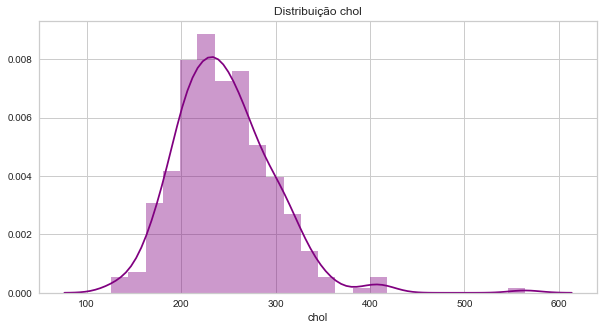

In [14]:
# Função de gráfico de distribuição 

def distribution(data, column):

        fig, axe = plt.subplots(figsize=(10,5))
        plt.title('Distribuição ' + column)
        return sns.distplot(data[column], color='purple')

# Distribuição da Medição de colesterol 
distribution(heart, 'chol')

In [15]:
# Análisar Colesterol por sexo. 

def visualization_sex(): 
    
    palette4 = ['#FFFFCC']
    palette5 = ['#3989E5', '#F24052']
    
    # Copiando os dados 
    heart_sex = heart.copy()
    
    # Convertendo para Categórica 
    heart_sex['sex'][heart_sex['sex']==1] = 'Male'
    heart_sex['sex'][heart_sex['sex']==0] = 'Female'
    
    # Criando plot 
    fig, axe = plt.subplots(figsize=(12,6))
    axe = sns.swarmplot(x='sex', y='chol', data=heart_sex, hue='sex', palette=palette5)
    axe2 = sns.violinplot(x='sex', y='chol', data=heart_sex, palette=palette4)
    axe.set_xlabel('Sexo', fontsize=12)
    axe.set_ylabel('Colesterol', fontsize=12)
    axe.set_title('Colesterol por Sexo', fontsize=15)
    axe.legend(loc='upper right', fontsize=12)
    
    fig.tight_layout()
    return axe 

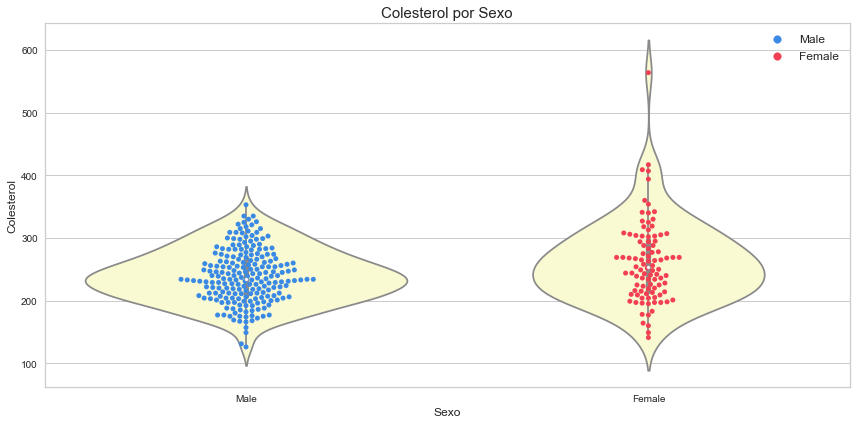

In [16]:
visualization_sex()

A base contém muito mais homens que mulheres cerca de <b> 68%</b> presente na base são homens, o gráfico de violino em conjunto com o swarmplot cria um gráfico que conseguimos dimensionar a análise. Homens tem níveis de colesterol com uma concentração maior na faixa intermediária de 250, já as mulheres apresentaram uma distribuição de pontos com valores mais alto de colesterol, Vamos ficar atentos a possíveis outliers mais a frente. 

A tabela abaixo informa bem quais os níveis de colesterol.

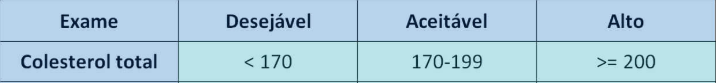

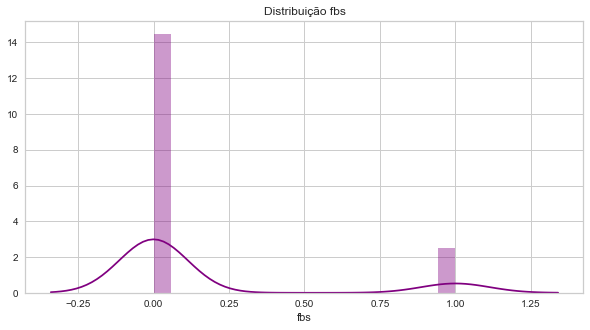

In [17]:
distribution(heart, 'fbs')

In [18]:
print('Sem açucar no sangue abaixo de 120 mg: ',heart['fbs'][heart['fbs']==0].count())
print('Com açucar no sangue acima de 120 mg',heart['fbs'][heart['fbs']==1].count())

Sem açucar no sangue abaixo de 120 mg:  258
Com açucar no sangue acima de 120 mg 45


Nesta variável de Açucar no sangue, o paciente em jejum é binária, recebendo valores 0 ou 1 
<br>

<Figure size 720x360 with 0 Axes>

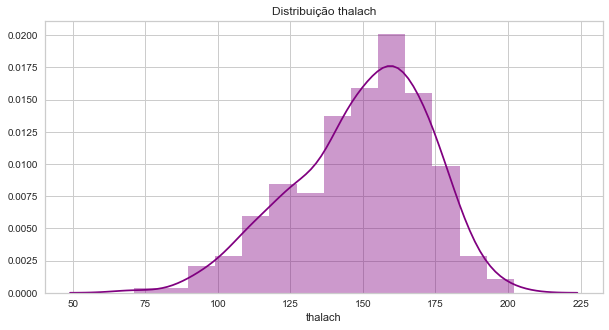

In [19]:
# Thalach é a frequência cardíaca máxima alcançada pela pessoa. 
plt.figure(figsize=(10,5))
distribution(heart, 'thalach')

In [20]:
""" GRÁFICO DE BARRAS """

# fig, axe = plt.subplots(figsize=(17,10))

#palette3 = ['#5959AB', '#00FFFF', '#000000', '#FF0000']

#sns.countplot(x='trestbps', data=heart4, palette=palette3, hue='cp')
#axe.set_xlabel('Pressão Arterial', fontsize=20)
#axe.set_ylabel('Frequência', fontsize=20)
#axe.set_title('Pressão Arterial/Dores no Peito abaixo de 136', fontsize=28)
#axe.legend(loc='upper right', fontsize=18)



"""GRÁFICO DE DISTRIBUIÇÃO """

#fig,ax=plt.subplots(4,3,figsize=(15,15))
#for i in range(12):
   # plt.subplot(4,3,i+1)
    #sns.distplot(heart.iloc[:,i],kde=True, color='Skyblue')

'GRÁFICO DE DISTRIBUIÇÃO '

<br>

## Pré-processamento 

In [21]:
# Identificando missing values 
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
# tipos de dados 
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
# Get_dummies     
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")

frames = [heart, a, b, c]
heart = pd.concat(frames, axis = 1)
heart = heart.drop(columns = ['cp', 'thal', 'slope'])

# Normalizer 
y = heart.target.values
x_data = heart.drop(['target'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [24]:
# Separando dados 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

<br>

## K-Nearest Neighbour (KNN) Classificação 

##### O que é o KNN?
KNN(K — Nearest Neighbors) é um dos muitos algoritmos ( de aprendizagem supervisionada ) usado no campo de data mining e machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.

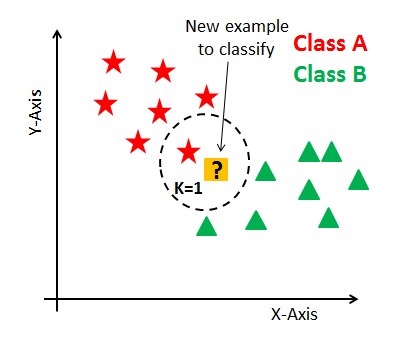

As etapas de um algoritmo KNN são:
* 1 — Recebe um dado não classificado;
* 2 — Mede a distância (Euclidiana, Manhattan, Minkowski ou Ponderada) do novo; dado com todos os outros dados que já estão classificados;
* 3 — Obtém as X(no caso essa variável X é o parâmetro K) menores distâncias;
* 4 — Verifica a classe de cada da um dos dados que tiveram a menor distância e conta a quantidade de cada classe que aparece;
* 5 — Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
* 6 — Classifica o novo dado com a classe tomada como resultado da classificação

#### Calculando a distancia:
Para calcular a distância entre dois pontos (sua nova amostra e todos os outros dados que você tem no seu dataset) é muito simples, como dito anteriormente, há várias formas de obter esse valor, neste artigo vamos usar a distância euclidiana, pois é uma das mais usadas.
A forma da distância euclidiana se encontra logo abaixo :


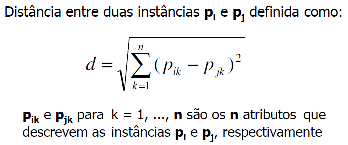

### Construindo modelo 

In [25]:
# K-NN 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 

# Modelo 
knn = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors = número de K 
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 88.52%


### Tunando valor de neighbors

Vou utilizar uma forma rápida e prática para encontrar o melhor valor de para ser inserido no principal hiperparâmetro do modelo KNN, a melhora do modelo é consistente pois devo buscar o melhor valor que se enquadrada neste modelo. 

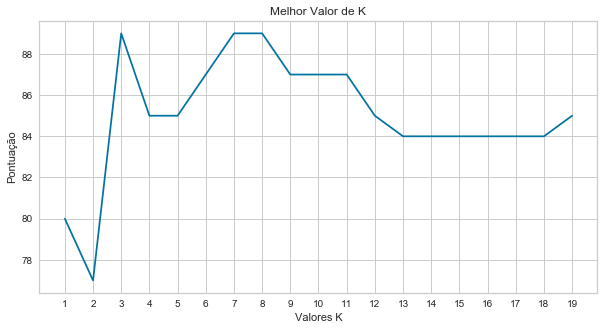

Pontuação Máxima do KNN: 89.0%


In [26]:
# Lista Pontuação 
scoreList = []
    
# Range de K 
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test).round(2)*100)

# Gráfico Valores K 
plt.figure(figsize=(10,5))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.ylabel('Pontuação')
plt.xlabel('Valores K')
plt.title('Melhor Valor de K')
plt.show()

# Pontuação máxima 
acc = max(scoreList)
print("Pontuação Máxima do KNN: {}%".format(acc))

O melhor valor de K apondado pelo tunning é o 3, vamos inserir o 3 como valor de K. 

In [27]:
confusion_matrix(y_test,prediction)

array([[24,  3],
       [ 4, 30]], dtype=int64)

In [28]:
# Modelo 
model_knn = KNeighborsClassifier(n_neighbors = 3)  # melhor valor de K = 3 
model_knn.fit(x_train, y_train)
prediction = model_knn.predict(x_test)

print("KNN Score: {}%".format(model_knn.score(x_test, y_test).round(4)*100))

KNN Score: 88.52%


### Métricas 

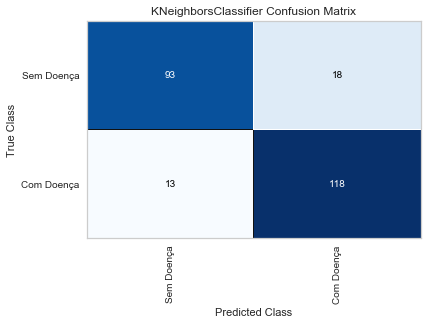

In [29]:
# Matrix de Confusão do Treino 
matrix = ConfusionMatrix(model_knn, classes=['Sem Doença','Com Doença'], cmap='Blues', percent=False)

matrix.fit(x_train, y_train)

matrix.score(x_train, y_train)

matrix.show()

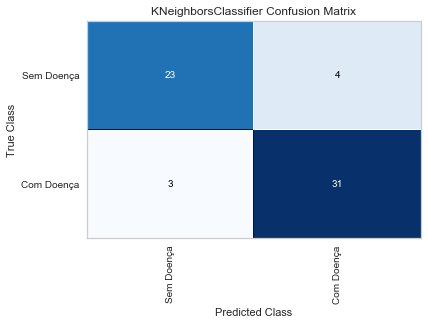

In [30]:
# Matriz de Confusão do Teste 

matrix2 = ConfusionMatrix(model_knn, classes=['Sem Doença','Com Doença'], cmap='Blues')

matrix2.score(x_test, y_test)

matrix2.show()

In [31]:
metricas = classification_report(y_test,prediction)
print(metricas)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### <font color="blue">Modelo KNN accurácia de: <font color="red">88.52%</font></font>

### Salvando modelo 

In [32]:
# Salvando modelo 
joblib.dump(model_knn, 'knn_doencasCardiacas')

['knn_doencasCardiacas']